In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA as PCA
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Get the data and print the head
df = pd.read_csv('C:/Users/jdque/Desktop/CVRP/CVRP_dataset.csv')
df.head()

,ID,Instance,Inst_Type,DptModule,CtyModule,DmdModule,1.NumberCities,2.SD_DistMat,3.XCent,4.YCent,...,19.Ratio_OutlierdemDem,20.Ratio_MaxcitydemDem,21.AvgRouteLength,22.Area_PS,23.MinNumberTrucks,L1.CWSoln,L2.SPSoln,L3.GASoln,L4.SOMSoln,Label
0,0,instance0-n75-k10-REQ,REQ,R,E,Q,74,122.337542,247.0,250.0,...,0.000000,0.173380,7.400000,184800,10,6229.895838,6239.645225,6942,6127.694427,SOM
1,1,instance10-n180-k18-RCU,RCU,R,C,U,179,140.820745,253.0,249.5,...,0.212291,0.100000,9.944444,243512,18,13285.485900,14146.781050,16620,1000000.000000,CW
2,2,instance100-n180-k12-ERcLvsr,ERcLvsr,E,Rc,Lvsr,179,131.142628,248.5,250.0,...,0.156390,0.083542,14.916667,248003,12,12950.623630,13499.414720,16840,13326.058200,CW
3,3,instance1000-n165-k24-CCU,CCU,C,C,U,164,122.096798,232.0,264.5,...,0.201220,0.142857,6.833333,218544,24,11837.803950,12400.133690,14054,1000000.000000,CW
4,4,instance1001-n95-k9-REMsfl,REMsfl,R,E,Msfl,94,122.483259,247.0,250.0,...,0.005618,0.689394,10.444444,187200,9,6995.423956,8350.458005,9208,7725.614130,CW


In [3]:
# check if there are any missing values in dataframe
null_val = False
for i in df:
    if df[i].isnull().values.any() == True:
        null_val = True
        break
print(null_val)

False


In [4]:
# get basic stats on the data
print('Data shape:', df.shape, '\n')
df.describe()

Data shape: (4897, 34) 



,ID,1.NumberCities,2.SD_DistMat,3.XCent,4.YCent,5.Radius_PS,6.FracDistinctDist,7.SD_NNDist,8.CV_NNDist,9.Ratio_ClustCities,...,18.Ratio_MaxclustdemCap,19.Ratio_OutlierdemDem,20.Ratio_MaxcitydemDem,21.AvgRouteLength,22.Area_PS,23.MinNumberTrucks,L1.CWSoln,L2.SPSoln,L3.GASoln,L4.SOMSoln
count,4897.000000,4897.000000,4897.000000,4897.000000,4897.000000,4897.000000,4897.000000,4897.000000,4897.000000,4897.000000,...,4897.000000,4897.000000,4897.000000,4897.000000,4897.000000,4897.000000,4897.000000,4897.000000,4897.000000,4897.000000
mean,2448.000000,109.140903,124.531057,248.490606,249.994180,184.814369,0.613335,13.682693,0.533573,0.047399,...,5.002583,0.112469,0.199330,10.693311,221529.347356,12.047784,9223.214554,10239.703002,11209.048397,219717.291362
std,1413.786464,53.102101,10.730962,15.103450,14.431217,16.754285,0.359363,8.905551,0.291956,0.024728,...,4.428289,0.090505,0.155748,4.389898,27508.698618,8.375272,5736.639869,7219.924675,7163.893124,407452.651753
min,0.000000,19.000000,55.675374,68.000000,112.500000,83.256419,0.000000,0.000000,0.000000,0.005435,...,0.304493,0.000000,0.041667,3.090909,49714.000000,1.000000,1451.692577,1466.089936,1327.000000,1451.692577
25%,1224.000000,64.000000,120.840420,246.000000,248.500000,180.389939,0.480000,9.858136,0.437547,0.028846,...,2.114286,0.013834,0.098592,7.125000,203472.000000,6.000000,5240.371762,5290.700148,5606.000000,5052.703397
50%,2448.000000,109.000000,123.406746,249.000000,250.000000,187.351117,0.740000,13.306672,0.591514,0.041667,...,3.692308,0.109014,0.150000,9.857143,233225.000000,10.000000,7837.638198,8233.827658,9849.000000,7797.181265
75%,3672.000000,154.000000,128.741749,251.500000,251.500000,193.315280,0.900000,17.893217,0.711770,0.061224,...,6.217228,0.175495,0.240964,13.800000,244032.000000,16.000000,11506.881710,12902.384130,15058.000000,13217.788490
max,4896.000000,199.000000,199.778366,368.000000,370.000000,249.837493,1.000000,67.160406,2.129836,0.166667,...,48.280000,0.483607,1.000000,24.142857,250000.000000,62.000000,47504.626250,59107.360780,50111.000000,1000000.000000


CW Labels 0.49846845007147234
SP Labels 0.021850112313661425
GA Labels 0.11129262813967736
SOM Labels 0.36838880947518887


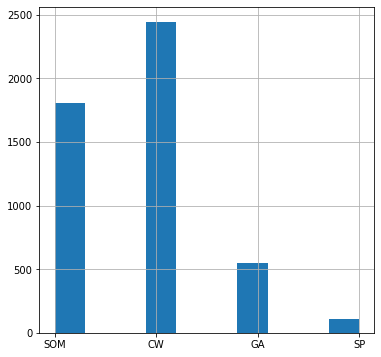

In [5]:
# Present a histogram of labels
hist = df['Label'].hist(figsize=(6, 6))
print('CW Labels', df[df['Label'] == 'CW'].shape[0]/df.shape[0])
print('SP Labels', df[df['Label'] == 'SP'].shape[0]/df.shape[0])
print('GA Labels', df[df['Label'] == 'GA'].shape[0]/df.shape[0])
print('SOM Labels', df[df['Label'] == 'SOM'].shape[0]/df.shape[0])

In [6]:
# drop the unnecessary columns and data
columns = ['ID', 'Instance', 'Inst_Type', 'DptModule', 'CtyModule', 'DmdModule', 'Label', 'L1.CWSoln', 'L2.SPSoln', 'L3.GASoln', 'L4.SOMSoln']
data = df.copy()
data.drop(axis=1, columns=columns, inplace=True)
data.head()

,1.NumberCities,2.SD_DistMat,3.XCent,4.YCent,5.Radius_PS,6.FracDistinctDist,7.SD_NNDist,8.CV_NNDist,9.Ratio_ClustCities,10.Ratio_OutlierCities,...,14.XDepot,15.YDepot,16.SD_Demand,17.Ratio_DemCap,18.Ratio_MaxclustdemCap,19.Ratio_OutlierdemDem,20.Ratio_MaxcitydemDem,21.AvgRouteLength,22.Area_PS,23.MinNumberTrucks
0,74,122.337542,247.0,250.0,190.488107,0.03,0.970151,0.029541,0.067568,0.000000,...,220,249,2.323748e-02,0.942732,2.021016,0.000000,0.173380,7.400000,184800,10
1,179,140.820745,253.0,249.5,201.832347,0.63,12.724449,0.818562,0.022346,0.212291,...,380,54,1.390000e-17,0.994444,4.500000,0.212291,0.100000,9.944444,243512,18
2,179,131.142628,248.5,250.0,193.654163,0.66,10.548122,0.566521,0.050279,0.162011,...,0,0,1.212545e-02,0.945071,3.297410,0.156390,0.083542,14.916667,248003,12
3,164,122.096798,232.0,264.5,183.542967,0.58,12.648072,0.873174,0.024390,0.201220,...,250,250,5.550000e-17,0.976190,14.714286,0.201220,0.142857,6.833333,218544,24
4,94,122.483259,247.0,250.0,188.079290,0.02,2.645796,0.100710,0.053191,0.010638,...,438,399,1.470898e-01,0.898990,2.484848,0.005618,0.689394,10.444444,187200,9


In [7]:
# scale the data
columns = data.columns
scaled_data = MinMaxScaler(feature_range=(-1,1), copy=False).fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=columns)
scaled_data.head()

,1.NumberCities,2.SD_DistMat,3.XCent,4.YCent,5.Radius_PS,6.FracDistinctDist,7.SD_NNDist,8.CV_NNDist,9.Ratio_ClustCities,10.Ratio_OutlierCities,...,14.XDepot,15.YDepot,16.SD_Demand,17.Ratio_DemCap,18.Ratio_MaxclustdemCap,19.Ratio_OutlierdemDem,20.Ratio_MaxcitydemDem,21.AvgRouteLength,22.Area_PS,23.MinNumberTrucks
0,-0.388889,-0.074798,0.193333,0.067961,0.287441,-0.94,-0.971109,-0.972260,-0.229274,-1.000000,...,-0.120,-0.004,-0.852238,0.770435,-0.928442,-1.000000,-0.725120,-0.590623,0.348931,-0.704918
1,0.777778,0.181729,0.233333,0.064078,0.423642,0.26,-0.621073,-0.231338,-0.790220,-0.103662,...,0.520,-0.784,-1.000000,0.977730,-0.825098,-0.122053,-0.878261,-0.348893,0.935213,-0.442623
2,0.777778,0.047407,0.203333,0.067961,0.325454,0.32,-0.685883,-0.468015,-0.443726,-0.315953,...,-1.000,-1.000,-0.922897,0.779811,-0.875231,-0.353233,-0.912608,0.123483,0.980059,-0.639344
3,0.611111,-0.078140,0.093333,0.180583,0.204057,0.16,-0.623347,-0.180055,-0.764867,-0.150407,...,0.000,0.000,-1.000000,0.904557,-0.399285,-0.167838,-0.788820,-0.644458,0.685889,-0.245902
4,-0.166667,-0.072776,0.193333,0.067961,0.258521,-0.96,-0.921210,-0.905429,-0.407602,-0.955083,...,0.752,0.596,-0.064687,0.595089,-0.909105,-0.976766,0.351779,-0.301391,0.372897,-0.737705


In [8]:
# conduct pca on the data
pca = PCA()
pca_data = pca.fit_transform(scaled_data)
pca_data = pd.DataFrame(pca_data, columns=range(1,24))
pca_data.head()

,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
0,1.392399,0.513737,0.559510,0.135538,0.484505,-0.365703,0.087967,0.062303,0.009210,-0.136471,...,-0.017543,-0.051860,-0.011563,0.006393,0.015511,-0.034367,0.039957,0.012624,0.017794,-0.000812
1,-0.180612,-0.029503,-1.048604,-0.257541,-0.363767,-0.311041,-0.012308,-0.898826,-0.406062,0.045236,...,0.158512,-0.157701,-0.004217,-0.055668,0.090027,0.094481,0.032287,0.016917,0.059546,0.052789
2,-0.234399,-1.139411,-0.570947,-0.668036,0.349979,0.041145,-0.145665,0.034695,-0.008083,0.097474,...,0.119890,-0.120517,0.019021,0.002548,0.013155,-0.004427,0.017541,-0.037525,-0.043552,0.012052
3,-0.073071,0.169664,-1.064722,0.129428,-0.438099,-0.507004,0.331770,0.010793,-0.068316,0.078098,...,0.126020,0.025996,0.110869,-0.101736,-0.079778,-0.085543,0.087733,-0.011778,0.019298,-0.062762
4,1.499526,1.400325,0.025532,0.768784,0.472490,0.817644,0.242585,-0.223502,-0.045303,0.121805,...,-0.074484,-0.053782,-0.049085,0.012229,-0.038474,0.000384,0.257429,-0.007475,-0.026612,-0.004247


In [9]:
# Display the variance percentage contained in each newly defined principal component
print(pca.explained_variance_ratio_)

[0.29328659 0.18567574 0.16992958 0.09241935 0.05700116 0.04114875
 0.038584   0.03436374 0.02147116 0.0153866  0.01133931 0.0070021
 0.00588227 0.00565967 0.004416   0.00392337 0.00306    0.00273979
 0.00190966 0.00153757 0.00129365 0.00106456 0.0009054 ]


In [10]:
# Display the cummulative variance percentage for each principal component
var_ratios = pca.explained_variance_ratio_
cum_var = [sum(var_ratios[:i]) for i in range(1, len(var_ratios) + 1)]
print(cum_var)

[0.2932865857836684, 0.4789623251242028, 0.6488919064251761, 0.7413112515908024, 0.7983124096467156, 0.8394611558258012, 0.8780451526339987, 0.9124088910207641, 0.9338800482191871, 0.9492666468213121, 0.9606059580042678, 0.9676080555772978, 0.9734903302097458, 0.9791499984965337, 0.9835660034632521, 0.9874893731294792, 0.9905493714808558, 0.9932891617712087, 0.9951988187718276, 0.9967363931103872, 0.9980300406148649, 0.9990945995148621, 1.0]


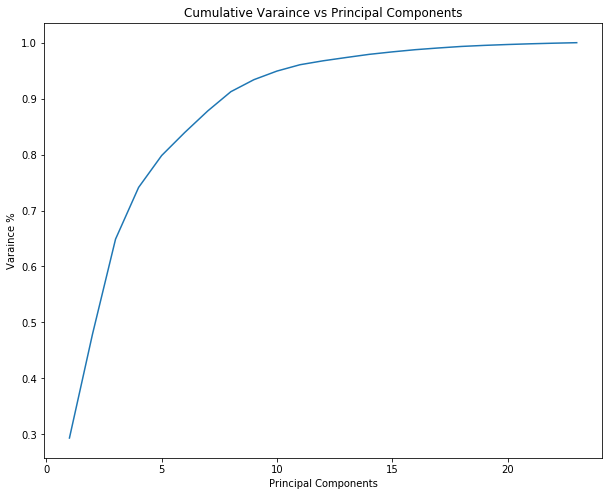

In [11]:
# plot the cummulative varaince over the principal components
x_axis = [i for i in range(1, 24)]
plt.figure(figsize=(10, 8))
plt.title('Cumulative Varaince vs Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Varaince %')
plt.plot(x_axis, cum_var)

In [12]:
# partition data by label
pca_data['Label'] = df['Label']
sp = pca_data[pca_data['Label'] == 'SP']
cw = pca_data[pca_data['Label'] == 'CW']
ga = pca_data[pca_data['Label'] == 'GA']
som = pca_data[pca_data['Label'] == 'SOM']

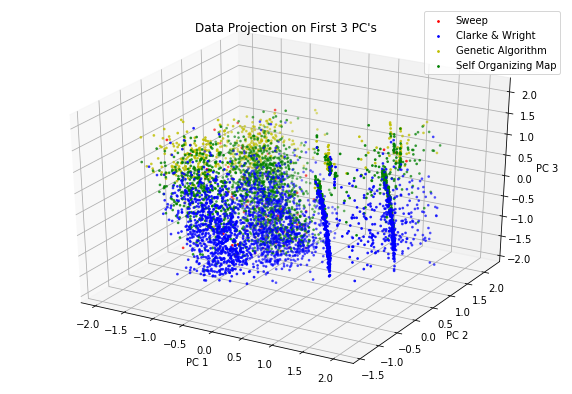

In [13]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.title("Data Projection on First 3 PC's")


# plot the data
ax.scatter3D(sp[1], sp[2], sp[3], color="r", s=3, label='Sweep')
ax.scatter3D(cw[1], cw[2], cw[3], color='b', s=3, label='Clarke & Wright')
ax.scatter3D(ga[1], ga[2], ga[3], color='y', s=3, label='Genetic Algorithm')
ax.scatter3D(som[1], som[2], som[3], color='g', s=3, label='Self Organizing Map')

plt.legend()

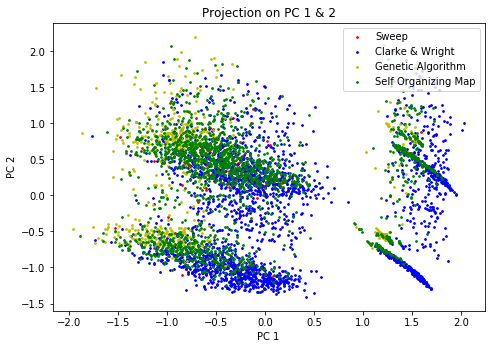

In [14]:
# Front veiw
fig= plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(sp[1], sp[2], color='r', s=3, label='Sweep')
ax.scatter(cw[1], cw[2], color='b', s=3, label='Clarke & Wright')
ax.scatter(ga[1], ga[2], color='y', s=3, label='Genetic Algorithm')
ax.scatter(som[1], som[2], color='g', s=3, label='Self Organizing Map')

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('Projection on PC 1 & 2')
plt.legend()
plt.show()

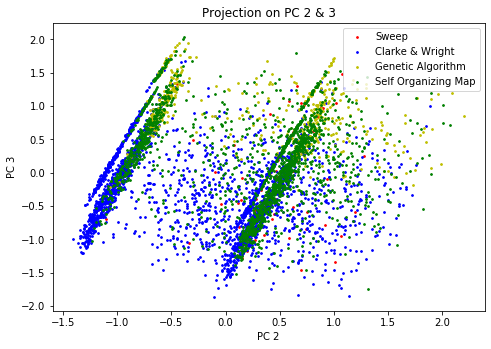

In [15]:
# Side view
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(sp[2], sp[3], color='r', s=3, label='Sweep')
ax.scatter(cw[2], cw[3], color='b', s=3, label='Clarke & Wright')
ax.scatter(ga[2], ga[3], color='y', s=3, label='Genetic Algorithm')
ax.scatter(som[2], som[3], color='g', s=3, label='Self Organizing Map')

ax.set_xlabel('PC 2')
ax.set_ylabel('PC 3')
ax.set_title('Projection on PC 2 & 3')
plt.legend()
plt.show()

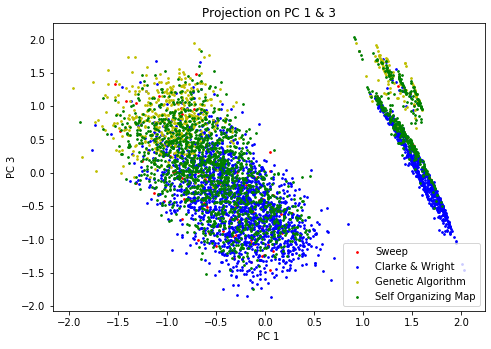

In [16]:
# Top view
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(sp[1], sp[3], color='r', s=3, label='Sweep')
ax.scatter(cw[1], cw[3], color='b', s=3, label='Clarke & Wright')
ax.scatter(ga[1], ga[3], color='y', s=3, label='Genetic Algorithm')
ax.scatter(som[1], som[3], color='g', s=3, label='Self Organizing Map')

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 3')
ax.set_title('Projection on PC 1 & 3')
plt.legend()
plt.show()